In [1]:
%matplotlib inline

In [2]:
import os, sys
THIS_DIR = os.path.abspath(os.getcwd())
sys.path.append(os.path.join(THIS_DIR, ".."))

import fcm
import fcm.atmosphere as atm

from enum import Enum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_observation(observation):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    for i, (label, series) in enumerate(observation.items()):
        ax.plot(series.to_numpy(), series.index.to_numpy(), '-' if i == 0 else '--', label=label)

    ax.set_xlabel("dEdz [kt TNT / km]")
    ax.set_ylabel("altitude [km]")
    ax.set_xscale('log')
    ax.legend(loc='best')
    
    return fig

In [4]:
def plot_simulation(dEdz, observation):
    mask = np.logical_and(dEdz.index.to_numpy() >= observation.index.min(),
                          dEdz.index.to_numpy() <= observation.index.max())
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    plt.plot(dEdz.to_numpy()[mask], dEdz.index.to_numpy()[mask], label='fcm')
    plt.plot(observation['min. dEdz [kt TNT / km]'].to_numpy(), observation.index.to_numpy(),
             "--", label='observation (min)')
    plt.plot(observation['max. dEdz [kt TNT / km]'].to_numpy(), observation.index.to_numpy(),
             "--", label='observation (max)')
    
    plt.xlabel("dEdz [kt TNT / km]")
    plt.ylabel("altitude [km]")
    plt.xscale('log')
    plt.legend(loc='best')
    
    return fig

In [5]:
import wheeler_meteoroids

## Load Atmosphere

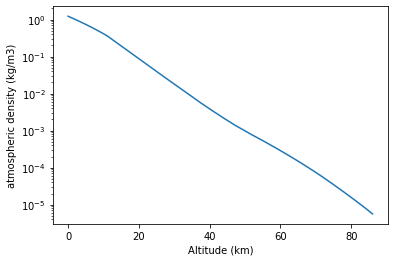

In [6]:
atmosphere = atm.US_standard_atmosphere()
atmosphere.plot()
plt.yscale('log')
plt.ylabel('atmospheric density (kg/m3)');

## Kosice Meteoroid

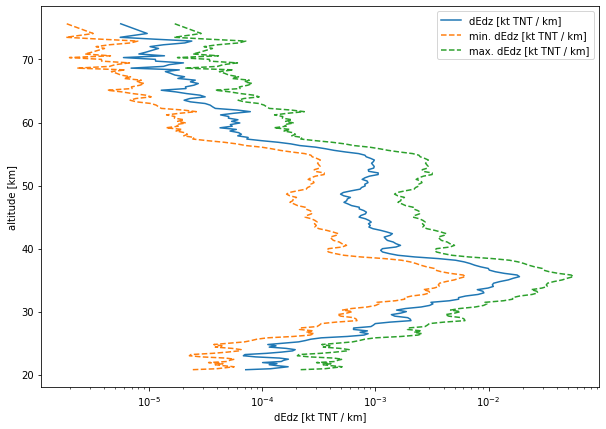

In [7]:
event = wheeler_meteoroids.Event.kosice
observation = wheeler_meteoroids.read_data(event)
fig_kosice_obs = plot_observation(observation)

In [8]:
impactor, params = event(atmosphere, 1e-2)
impactor.groups_table()

,Group mass fraction (%),Group density (kg/m^3),Number of pieces in group,Strength (kPa),Cloud mass fraction (%),Strength scaling exponent,Fragment mass fractions,Component masses (kg),Group mass (kg)
Group ID,,,,,,,,,
0,14.0,3400.0,300,2.0,0.2,2.0,"(0.8, 0.2)",1.633480,490.043987
1,3.0,3400.0,1,35.0,50.0,0.1,"(0.8, 0.2)",105.009426,105.009426
2,3.0,3400.0,1,55.0,50.0,0.8,"(0.8, 0.2)",105.009426,105.009426
3,80.0,3400.0,1,1150.0,50.0,0.3,"(0.8, 0.2)",2800.251357,2800.251357


In [9]:
results = fcm.simulate_impact(params, impactor, 100, craters=False, dedz=True, final_states=True)

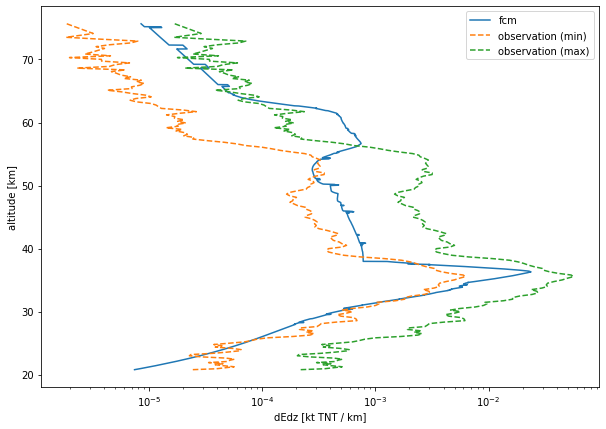

In [10]:
fig_kosice_sim = plot_simulation(results.energy_deposition, observation)

In [12]:
results.final_states

,t,m,v,angle,z,x,y,r,density,dEdz,ram pressure,h
0,1.275856,3500.223160,15.010271,59.938301,83.425564,9.445233,0.000000,0.694000,2500.000000,7.799495e-07,2.000000,83.425564
113341321,4.781421,2749.371406,14.855690,59.767669,37.969372,35.596039,0.000034,0.581486,3400.000000,3.332574e-04,1150.000000,37.969372
3145102012,10.894757,658.340954,0.212192,63.228347,30.164380,40.079560,-0.001837,3.992017,2.470501,4.730443e-06,0.790583,30.164380
1437271327,4.817101,1097.952344,14.839475,59.759510,37.511703,35.861262,0.000159,0.425836,3400.000000,1.910047e-04,1229.619790,37.511703
3757111225,10.618740,263.350558,0.213581,63.058078,30.473289,39.904614,0.001619,2.625127,3.475320,1.979362e-06,0.763536,30.473289
...,...,...,...,...,...,...,...,...,...,...,...,...
1740779345,5.794107,0.013139,4.054375,59.797228,34.208000,37.768587,-0.018622,0.011689,3400.000000,8.785577e-09,152.856836,34.208000
494717744,6.113423,0.016113,3.182417,59.787631,33.369771,38.264665,-0.024070,0.012881,3400.000000,7.262131e-09,107.532565,33.369771
301143912,6.440114,0.019946,2.574557,59.800489,32.485935,38.780872,-0.013430,0.014060,3400.000000,6.400475e-09,81.056063,32.485935
978151862,6.772656,0.024803,2.116369,59.845117,31.572170,39.298554,-0.008598,0.015258,3400.000000,5.814724e-09,63.267311,31.572170


## Tagish Lake Meteoroid

In [ ]:
event = wheeler_meteoroids.Event.tagish_lake
observation = wheeler_meteoroids.read_data(event)
fig_tagish_lake_obs = plot_observation(observation)

In [ ]:
impactor, params = event(atmosphere, 1e-2)
impactor.groups_table()

In [ ]:
results = fcm.simulate_impact(params, impactor, 100, craters=False, dedz=True, final_states=True)

In [ ]:
fig_tagish_lake_sim = plot_simulation(results.energy_deposition, observation)

## Benesov meteoroid

In [ ]:
event = wheeler_meteoroids.Event.benesov
observation = wheeler_meteoroids.read_data(event)
fig_benesov_obs = plot_observation(observation)

In [ ]:
impactor, params = event(atmosphere, 1e-4)
impactor.groups_table()

In [ ]:
results = fcm.simulate_impact(params, impactor, 100, craters=False, dedz=True, final_states=True)

In [ ]:
fig_benesov_sim = plot_simulation(results.energy_deposition, observation)

## Chelyabinsk Meteoroid

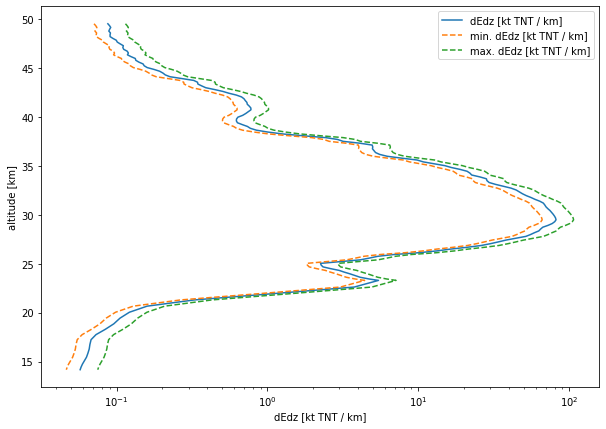

In [13]:
event = wheeler_meteoroids.Event.chelyabinsk
observation = wheeler_meteoroids.read_data(event)
fig_chelyabinsk_obs = plot_observation(observation)

In [ ]:
impactor, params = event(atmosphere, 1e-4)
impactor.groups_table()

In [ ]:
results = fcm.simulate_impact(params, impactor, 100, craters=False, dedz=True, final_states=True)

In [ ]:
fig_chelyabinsk_sim = plot_simulation(results.energy_deposition, observation)

In [21]:
atmosphere = atm.static_martian_atmosphere()

In [25]:
impactor, params = wheeler_meteoroids.kosice_meteoroid(atmosphere)

In [28]:
result = fcm.simulate_impact(params, impactor, 100, craters=True, dedz=True, final_states=False)

In [29]:
from fcm import crater_tools

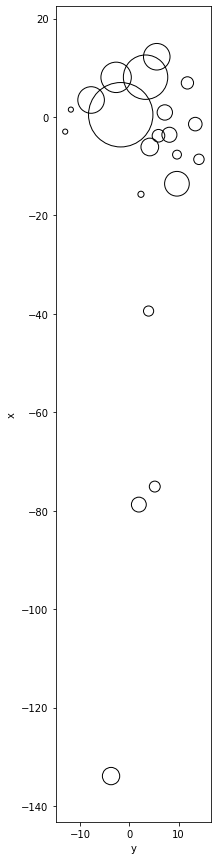

In [33]:
crater_tools.plot_craters(result.craters, figsize=(15, 15));